In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
%matplotlib inline
import seaborn as sns
import statistics
import warnings
warnings.filterwarnings('ignore')

#import machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris 

from sklearn.tree import DecisionTreeClassifier

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.externals import joblib #save model

from xgboost import XGBClassifier
import xgboost

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve


### Получаем значения

In [2]:
y_2018 = pd.read_csv("C:/Users/User/Desktop/python/Обучение/dataset/2018.csv", delimiter=';');
y_2019 = pd.read_csv("C:/Users/User/Desktop/python/Обучение/dataset/2019.csv");

data = pd.concat([y_2018,y_2019],sort=False)
#data

###  Получаем информацию о таблице

In [3]:
data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,NaN
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,312.0,78.500000,45.104737,1.000,39.75000,78.5000,117.25000,156.000
Score,312.0,5.391506,1.114631,2.853,4.51425,5.3795,6.17600,7.769
GDP per capita,311.0,0.897254,0.394796,0.000,0.60800,0.9600,1.21450,2.096
Social support,311.0,1.210032,0.300280,0.000,1.05550,1.2650,1.45600,1.644
Healthy life expectancy,310.0,0.660284,0.253162,0.000,0.48675,0.6955,0.85675,1.141
Freedom to make life choices,311.0,0.422865,0.155820,0.000,0.32100,0.4490,0.53950,0.724
Generosity,311.0,0.182727,0.096831,0.000,0.10850,0.1750,0.24450,0.598
Perceptions of corruption,305.0,0.110636,0.095190,0.000,0.05000,0.0820,0.13800,0.457


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  312 non-null    int64  
 1   Country or region             312 non-null    object 
 2   Score                         312 non-null    float64
 3   GDP per capita                311 non-null    float64
 4   Social support                311 non-null    float64
 5   Healthy life expectancy       310 non-null    float64
 6   Freedom to make life choices  311 non-null    float64
 7   Generosity                    311 non-null    float64
 8   Perceptions of corruption     305 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 24.4+ KB


In [10]:
# процент пропущенный значений
# процент пропущенный значений
for col in data.columns:
        pct_missing = np.mean(data[col].isnull())
        if pct_missing  != 0:
            print('{} - {}%'.format(col, round(pct_missing*100)))     

GDP per capita - 0.0%
Social support - 0.0%
Healthy life expectancy - 1.0%
Freedom to make life choices - 0.0%
Generosity - 0.0%
Perceptions of corruption - 2.0%


### Чистим данные
удалим ненужные столбцы
выбросы ( данные в диапазоне)

In [11]:
# удалим лишниее стоблцы. те что имеют много пропусков или не ненужны
df = data
#df = data.drop(['Score'], axis=1)
# удалим в дипазаони
#diap = df.drop(data[(df.score < 2) | (df.score > 99)].index)  # удаление в дипазоне


### Сразу для удобства переименуем столбцы

In [12]:
import transliterate
print(transliterate.translit('Привет', reversed=True))

Privet


In [13]:
df.rename(columns={
    "Overall rank": "rank",
    "Country or region": "country",
    "Score": "score",
    "GDP per capita": "gdp",
    "Social support": "social",
    "Healthy life expectancy": "healthy",
    "Freedom to make life choices": "freedom",
    "Generosity": "generosity",
    "Perceptions of corruption": "corruption"
},inplace=True)
del df["rank"]

In [ ]:
#! pip install transliterate
# или так
# import transliterate
# numerics = data.copy()

# result = [] # созадем серию чтобы к ней прибалять result.append(col)
# for col in numerics.columns:
#     col = col.replace(' ','_')[:15]
#     col = col.replace('-','_')
#     col = col.replace('ь','')
#     col = col.replace('ъ','')
#     col=transliterate.translit(col, 'ru', reversed=True)
#     result.append(col) 
# numerics.columns = result
# numerics.columns 

In [ ]:
# для боевых задач быстрее так
#data.columns = ['A' + str(i) for i in range(1, 16)] + ['class']

In [14]:
# смотрим какие данные не нужжны изза пропущенных значений.
for col in data.columns:
        pct_missing = np.mean(data[col].isnull())
        print('{} - {}%'.format(col, round(pct_missing*100)))
      

country - 0.0%
score - 0.0%
gdp - 0.0%
social - 0.0%
healthy - 1.0%
freedom - 0.0%
generosity - 0.0%
corruption - 2.0%


In [15]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
missing_values_table(df)    

Your selected dataframe has 8 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
corruption,7,2.2
healthy,2,0.6
gdp,1,0.3
social,1,0.3
freedom,1,0.3
generosity,1,0.3


In [16]:
## Get the columns with > 50% missing
missing_df = missing_values_table(df);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))
df = df.drop(columns = list(missing_columns))
df

Your selected dataframe has 8 columns.
There are 6 columns that have missing values.
We will remove 0 columns.


,country,score,gdp,social,healthy,freedom,generosity,corruption
0,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,Norway,7.594,1.456,1.582,0.861,0.686,0.286,NaN
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...
151,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


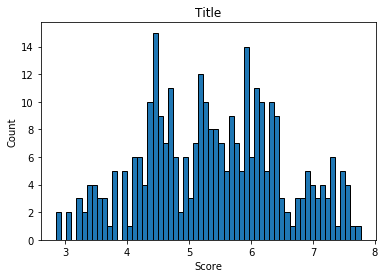

In [17]:
# Histogram of the Energy Star Score

plt.hist(df['score'].dropna(), bins = 60, edgecolor = 'k');
plt.xlabel('Score'); plt.ylabel('Count');
plt.title('Title');

### Ищем недостающие данные
https://techrocks.ru/2020/04/02/data-cleaning-with-python/ чистка данных

In [13]:
df.isnull().sum()

country       0
score         0
gdp           1
social        1
healthy       2
freedom       1
generosity    1
corruption    0
dtype: int64

#### Если бы проблема был одна или имела закономерсность и была кореляция, то нашлибы адресно и изменили
например вывели недостающие по corruption, посмотрели с кролериуемые score и решили что пропущенные пусть будут среднии  от score > 6.74

In [18]:
df[df["corruption"].isnull()]

,country,score,gdp,social,healthy,freedom,generosity,corruption
1,Norway,7.594,1.456,1.582,0.861,0.686,0.286,NaN
19,United Arab Emirates,6.774,2.096,0.776,0.670,0.284,0.186,NaN
25,Taiwan,6.441,1.365,1.436,0.857,0.418,0.151,NaN
36,Colombia,6.260,0.960,1.439,0.635,0.531,0.099,NaN
48,Belize,5.956,0.807,1.101,0.474,0.593,0.183,NaN
53,Japan,5.915,1.294,1.462,0.988,0.553,0.079,NaN
62,Estonia,5.739,1.200,1.532,0.737,0.553,0.086,NaN


In [18]:
avg_data_corruption = df[df["score"] > 6.774].mean().corruption
df.loc[df["corruption"].isnull(),["corruption"]] = avg_data_corruption
df[df["corruption"].isnull()]
avg_data_corruption

0.26397435897435906

####  Посмотрим как корелирует
есть небольшая кореляция поэтому подставим среднее значение для значений 

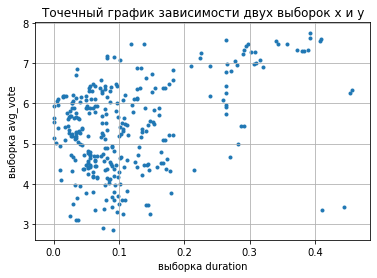

In [41]:
duration = df['corruption']
avg_vote = df['score']
plt.xlabel('выборка duration')
plt.ylabel('выборка avg_vote')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(duration, avg_vote, marker='.')
#plt.plot(duration, avg_vote) если надо линией



#### или так

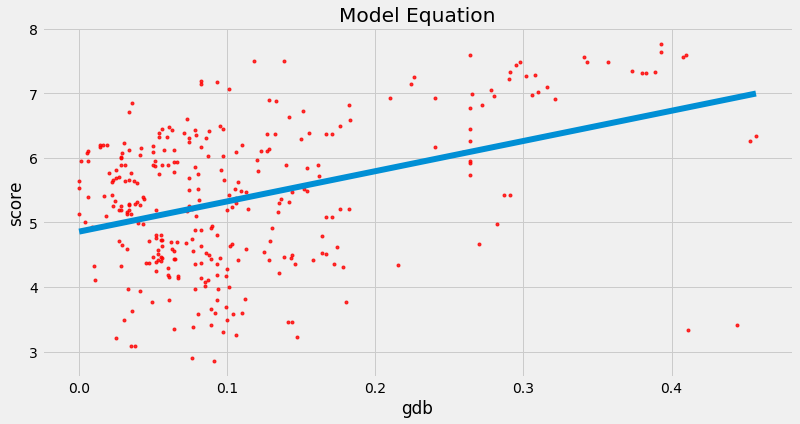

In [49]:
plt.figure(figsize=(12,6))
g = sns.regplot(x=data["corruption"],y=data["score"],ci=None,scatter_kws = {'color':'r','s':9})
g.set_title("Model Equation")
g.set_ylabel("score")
g.set_xlabel("gdb")
plt.show()

### Если кореляции нет и пропусков много
два способа sklearn и KNNImputer - по сути ищут среднюю

In [50]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

df = pd.DataFrame(df.corruption)
df2= imp.fit_transform(df)

df["corruption"]= df2
df["corruption"]

# выведим только нулевые
bool_series = pd.isnull(data["corruption"])  
df[bool_series]
# сравним что получилось

# сравним что получилось. corruption  будут новые значения. вывод только пропущенных значений по corruption  
# создадим еще оди столбец для сравнения, созд новый фрейм и стоблец нев в него помещаем 
#df_marks = pd.DataFrame(data.corruption)
#df_marks['new'] = df2
#bool_series2 = pd.isnull(data2["corruption"] )  
#print(data[bool_series2])

#df2

,corruption


In [1]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df_filled = imputer.fit_transform(df)
print(df_filled)

NameError: name 'df' is not defined

#### Поищем выбросы. хотя похожую вещь делали раннее когда убирали в дипазаное

In [10]:
df = df.select_dtypes(include=["float64","int64"])
df.head()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,7.594,1.456,1.582,0.861,0.686,0.286,NaN
2,3,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,7.487,1.420,1.549,0.927,0.660,0.256,0.357


#### по графику видим что corruption generosity имеют выбросы. 
далее можем удалить адресно или диапазоном

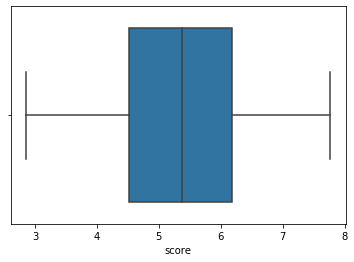

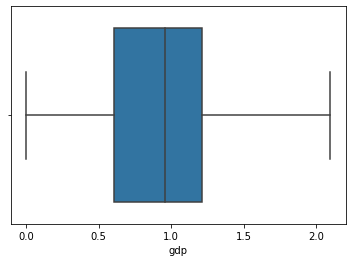

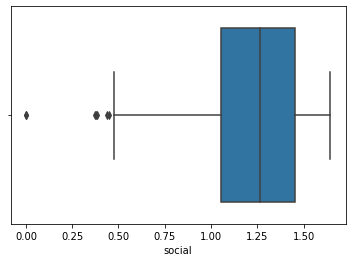

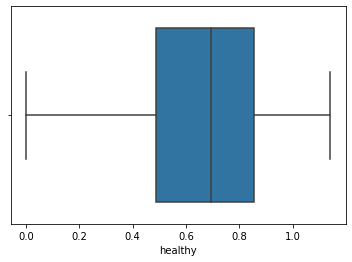

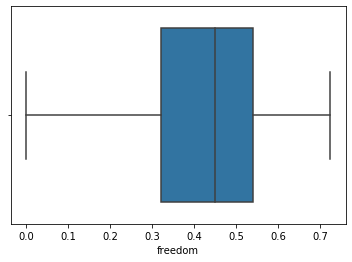

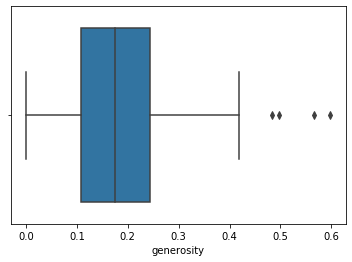

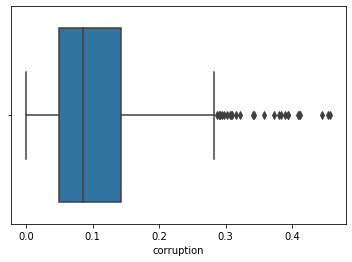

In [20]:
column_list = ["score","gdp","social","healthy","freedom","generosity","corruption"]
for col in column_list:
    sns.boxplot(x = df[col])
    plt.xlabel(col)
    plt.show()

In [48]:
# x = [i for i in range(0, len(df['corruption'])-1)]
# y = df.loc[df['corruption'] < 5000, 'corruption']

# plt.xlabel('номер фильма')
# plt.ylabel('длительность')
# plt.title('Точечный график зависимости двух выборок x и y')
# plt.grid(True)
# plt.scatter(x, y, marker='.')
# plt.show()

#diap = df.drop(df[(df.score < 2) | (df.score > 99)].index)  # удаление в дипазоне
#df = df.loc[df['score'] > 50, :] посмотреть
#df = df.loc[df['score']!=35647, :] удаление по индексу


### Кодировадние данных
когда есть категориальные признаки их лучше перевести в код. но если их несколько то добавить доп полями с кодом 0 1

In [50]:
df['country'].value_counts(dropna=False) 

Mexico             2
Madagascar         2
Russia             2
Togo               2
Serbia             2
                  ..
Comoros            1
Macedonia          1
North Macedonia    1
Belize             1
Sudan              1
Name: country, Length: 160, dtype: int64

In [68]:
#не работает

pd.get_dummies(df['country']) 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
label_encoder = LabelEncoder()   
ohe = OneHotEncoder(categorical_features = ['country'])  
label_encoded_data = label_encoder.fit_transform(df['country']) 
ohe.fit_transform(label_encoded_data.reshape(-1,1)) 

TypeError: __init__() got an unexpected keyword argument 'categorical_features'

### Нормализация данных и кореляция

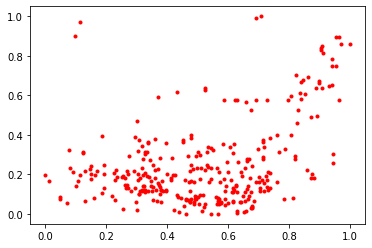

0.40636500127082964


In [80]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['score', 'corruption']])
df_norm = pd.DataFrame(np_scaled)
#print(df_norm[:5])
volume = df_norm[0]
bags = df_norm[1]
plt.plot(volume, bags, 'r.')
plt.show()

from scipy.stats import pearsonr
corr, p_value = pearsonr(df['score'], df['corruption'])
print(corr)

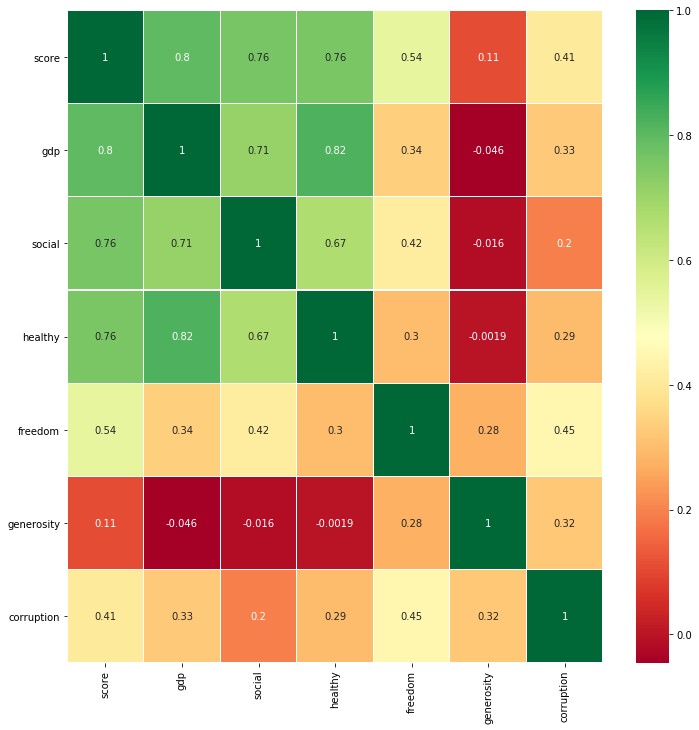

generosity    0.105822
corruption    0.406365
freedom       0.539522
healthy       0.755479
social        0.760133
gdp           0.797606
score         1.000000
Name: score, dtype: float64

In [83]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()
# вывод в виде текста по признаку
# correlations_data = data.corr()['score'].sort_values()
# correlations_data